In [299]:
import json
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from collections import defaultdict
import matplotlib.pyplot as plt

import csv


from tensorflow import keras
from tensorflow.keras import layers


In [300]:
file = open("systemCalibration.json")
data = json.load(file)


open System calibration file that contain the reading from the real world and reading from the camera

In [301]:
features = data['camera']
for i in features.items():
    for it, r in enumerate(i[1]):
        i[1][it] = list(r.values())


In [302]:

labels = defaultdict(list)
for record in data['real']:
    r = record.copy()
    ids = r['ids']
    r.pop('ids', None)
    for id in ids: 
        labels[id].append(list(r.values()))

In [303]:
# For X values
X = np.array(features["_0"])
Y = np.array(labels[0])
Z = np.concatenate((X, Y), axis=1)
np.savetxt("systemCalibration.csv", Z, delimiter=",")
model1 = LinearRegression()
model1.fit(X, Y)
# xm = np.polyfit(X[:,1:2], Y[:,:1], 3)



PermissionError: [Errno 13] Permission denied: 'systemCalibration.csv'

[[2.05113606e-01 5.50436171e-02 4.82641646e+01]
 [3.42260116e-01 1.63699507e-01 5.22752392e+01]
 [2.60029618e-01 5.24236380e-02 2.67327188e+02]
 [4.46430350e-01 1.50716457e-01 4.60439519e+01]
 [2.80798727e-01 2.18804196e-01 1.25861664e+02]
 [6.51633795e-01 3.39928582e-01 1.91944902e+02]
 [4.12544560e-01 2.52426167e-01 1.99269113e+02]
 [6.12477115e-01 4.51538128e-01 1.10714187e+02]
 [2.71444557e-01 2.19616407e-01 1.20720968e+02]
 [6.15687898e-01 4.39851819e-01 1.33704372e+02]
 [4.31961009e-01 4.46901369e-01 1.73034791e+02]
 [1.19756958e-01 4.00350654e-01 1.36612093e+02]
 [6.59189301e-01 3.58610081e-01 6.05949460e+00]
 [4.02068140e-01 4.29629119e-01 1.53661083e+02]
 [3.83103470e-01 1.76413576e-01 2.66901749e+02]
 [6.26864938e-01 2.84704592e-01 4.06428639e+01]
 [3.89211239e-01 3.53362012e-01 1.56369117e+02]
 [6.31385198e-01 1.87520658e-01 1.86866283e+02]
 [5.69458719e-01 4.46477635e-01 1.34773034e+02]
 [6.09606001e-01 1.39350157e-01 1.00876691e+02]
 [4.79443436e-01 1.45758485e-01 1.357670

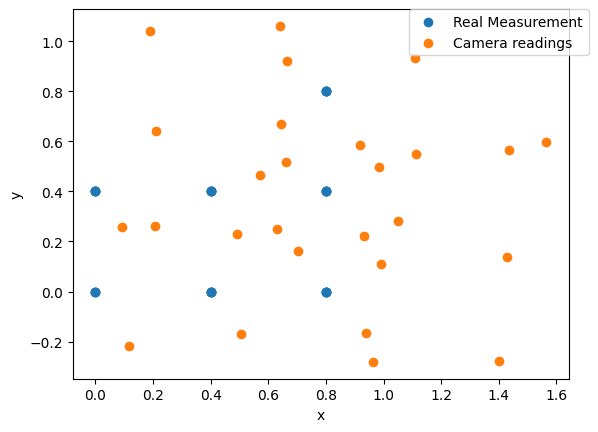

In [ ]:

pred = model1.predict(X)
print(pred)
plt.scatter(Y[:, :1], Y[:, 1:2], label="Real Measurement")
plt.scatter(X[:, 1:2], X[:, :1], label="Camera readings")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
# plt.scatter(pred[:, :1], pred[:, 1:2])
print(Y.shape)
plt.xlabel("x")
plt.ylabel("y")
print("R^2 Score : ",r2_score(Y, pred))


In [ ]:
horsepower_normalizer =  layers.Normalization(input_shape=[6,])
horsepower_normalizer.adapt(X)
model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(units=3)
])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_19 (Normaliza  (None, 6)                13        
 tion)                                                           
                                                                 
 dense_64 (Dense)            (None, 64)                448       
                                                                 
 dense_65 (Dense)            (None, 64)                4160      
                                                                 
 dense_66 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4,816
Trainable params: 4,803
Non-trainable params: 13
_________________________________________________________________


In [ ]:

model.predict(X)
# model.fit(X, Y, epochs=100)

1/1 [==============================] - 0s 56ms/step


array([[-2.91449845e-01, -9.33836699e-01,  1.45712346e-02],
       [-4.14347708e-01, -1.21694684e+00,  3.95527124e-01],
       [-1.97113216e-01, -6.79962873e-01,  3.52532923e-01],
       [-2.43398815e-01, -7.43252218e-01,  1.10396564e-01],
       [-3.75783116e-01, -1.04366696e+00,  4.67555285e-01],
       [-3.72404069e-01, -3.25661540e-01,  2.04748958e-02],
       [-1.32669285e-01, -5.41202188e-01,  4.29956242e-02],
       [-5.19508980e-02, -4.34077561e-01, -3.02027594e-02],
       [-2.75636852e-01, -6.74201548e-01, -4.25346941e-03],
       [-1.89202785e-01, -2.42394716e-01, -9.04387459e-02],
       [-4.01313722e-01, -2.95622051e-01, -3.02415341e-02],
       [-9.98258591e-02, -6.50764585e-01, -1.26676321e-01],
       [-8.04914013e-02, -6.49381638e-01,  2.82366216e-01],
       [-4.49538231e-04, -4.94511932e-01, -1.13614932e-01],
       [-3.01428199e-01, -6.09437883e-01,  5.59644043e-01],
       [-4.45848852e-02, -7.75096953e-01,  1.89640507e-01],
       [ 2.51825452e-02, -6.20711148e-01

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [ ]:

history = model.fit(
    X,
    Y,
    epochs=1000,
    verbose=0)

In [ ]:
mPred = model.predict(X)
print("R^2 Score : ",r2_score(Y, mPred))

1/1 [==============================] - 0s 34ms/step
R^2 Score :  0.9828994162521322


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

KeyError: 'val_loss'

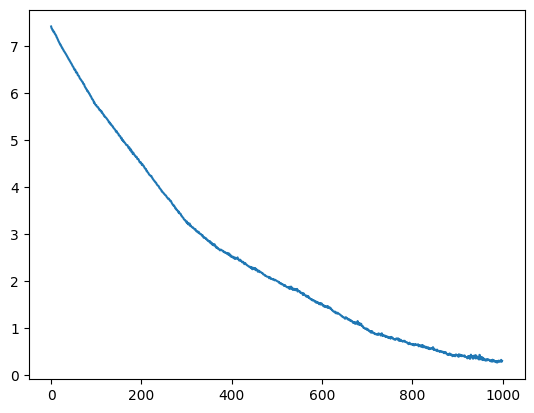

In [ ]:
plot_loss(history)

In [ ]:

# [-0.18551, 0.0934551, 3.15415, 3.07379, -0.0540372, -0.557751]
model.predict([-0.476185, 0.643159, 3.1303, -2.8503, 1.01683, -1.08323])

1/1 [==============================] - 0s 50ms/step


array([[-0.61558825,  0.52987355, 19.497545  ]], dtype=float32)